sklearn.cross_validation.KFold(n=100, n_folds=3, shuffle=True, random_state=None)
Regressor score: 0.4533
[ 0.62048772  0.20355355  0.25528816  0.40147239  0.46092689]
[ 0.27433576  0.25608945  0.31830588  0.38203757  0.32195551]
[ 6 21 36 51 66]


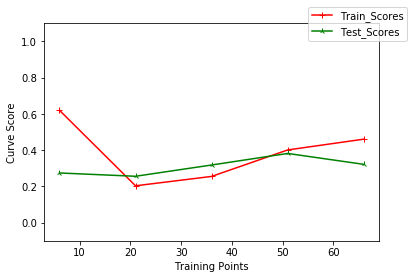

In [19]:
# In this exercise we'll examine a learner which has high bias, and is incapable of
# learning the patterns in the data.
# Use the learning curve function from sklearn.learning_curve to plot learning curves
# of both training and testing error.

from sklearn.linear_model import LinearRegression
from sklearn.learning_curve import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, make_scorer
from sklearn.cross_validation import KFold
import numpy as np
%matplotlib inline

# Set the learning curve parameters; you'll need this for learning_curves
size = 100
cv_sets = KFold(size, shuffle=True)
print(cv_sets)
scorer = make_scorer(explained_variance_score)

# Create a series of data that forces a learner to have high bias
# Note for this quiz you do not need to create training and testing sets
X = np.reshape(np.random.normal(scale=2,size=size),(-1,1))
y = np.array([[1 - 2*x[0] +x[0]**2] for x in X])



reg = LinearRegression()
reg.fit(X,y)
print "Regressor score: {:.4f}".format(reg.score(X,y))

# TODO: Use learning_curve imported above to create learning curves from X and y.
# You will need to use 'cv_sets' and 'scorer' as parameters in the function.

train_sizes, train_scores, test_scores = learning_curve(reg, X,y, cv=cv_sets,scoring=scorer)
m_train_scores=np.mean(train_scores, axis=1)
m_test_scores=np.mean(test_scores, axis=1)
print(m_train_scores)
print(m_test_scores)
print(train_sizes)

# TODO: Plot the learning curves for both the training scores and testing scores.
#       Use plt.plot() twice -- one for each score. Be sure to give them labels!
# NOTE: Using plt.plot(train_scores) will get you 6 lines when we are looking to 
# plot just 2(mean scores for training and testing). 
# You can use np.mean(train_scores, axis =1) to get mean train_scores values. 
# Similarly you can get the mean for the test_scores.
plt.plot(train_sizes,m_train_scores,label='Train_Scores',color='r',marker='+')
plt.plot(train_sizes,m_test_scores,label='Test_Scores',color='g',marker='2')
# Plot aesthetics
plt.ylim(-0.1, 1.1)
plt.ylabel("Curve Score")
plt.xlabel("Training Points")
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.show()

In [ ]:
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC